# Least square method

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_circles
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

We start by measuring the distance between points and the regression line. These distances are here in red dashes

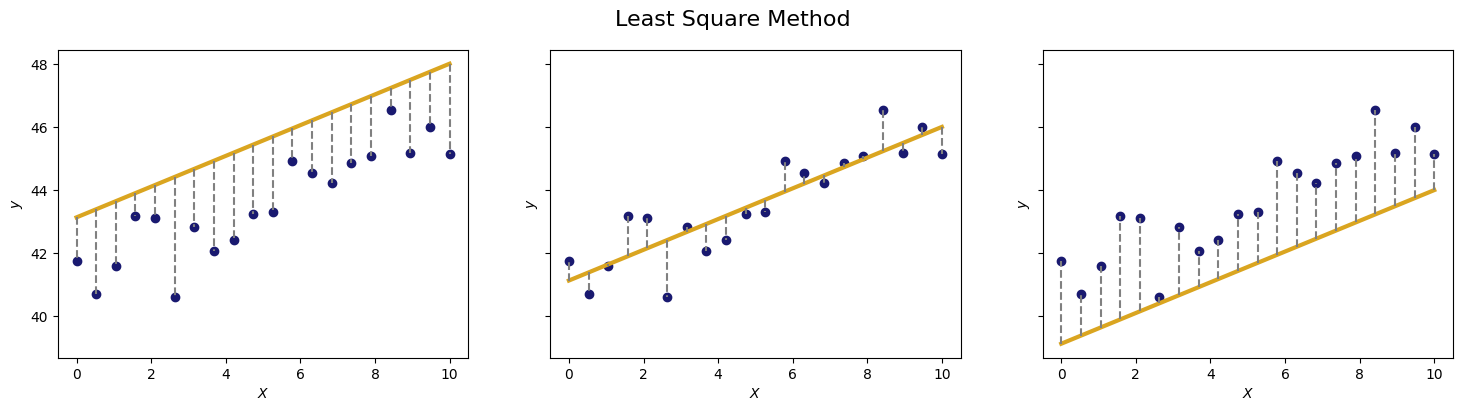

In [5]:
np.random.seed(0)

m = 20
X = np.linspace(0, 10, m)
y = 0.6 * X + 40 + np.random.randn(m)

model = LinearRegression().fit(X.reshape(-1,1), y.reshape(-1,1))
preds = model.predict(X.reshape(-1,1))

fig, ax = plt.subplots(1, 3, figsize=(18, 4), sharey=True)
fig.suptitle("Least Square Method", fontsize=16)
list_bias = [2, 0, -2]
for i, bias in enumerate(list_bias):
    ax[i].scatter(X, y, color='midnightblue')
    ax[i].plot(X, preds + bias, color='goldenrod', lw = 3)
    ax[i].vlines(x=X, ymin=preds + bias, ymax = y, color='gray', ls='--')
    ax[i].set_xlabel('$X$')
    ax[i].set_ylabel('$y$')
    
plt.show()

Let's see the evolution of the Mean Square Error by evolving each parameters individually 

/tmp/ipykernel_5225/109509163.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[1].scatter(model.coef_ + coef, L, c=c)


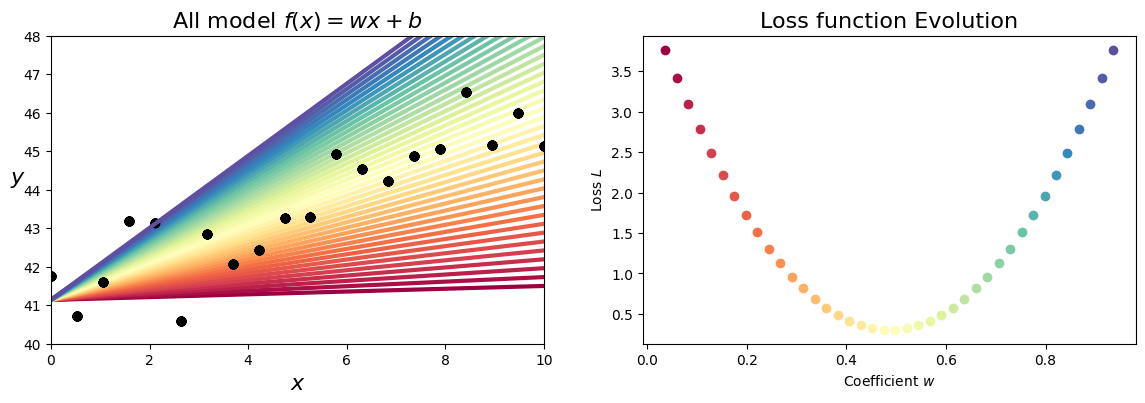

In [6]:
np.random.seed(0)

m = 20
X = np.linspace(0, 10, m)
y = 0.6 * X + 40 + np.random.randn(m)

model = LinearRegression().fit(X.reshape(-1, 1), y.reshape(-1, 1))
# preds = model.predict(X.reshape(-1, 1))

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
list_coefs = np.linspace(-0.45, 0.45, 40)

color = iter(plt.cm.Spectral(np.linspace(0, 1, len(list_coefs))))

for coef in list_coefs:
    pred = X * (model.coef_ + coef) + model.intercept_
    pred = pred.squeeze()
    c = next(color)
    ax[0].scatter(X, y, color='k', zorder = -1)
    ax[0].plot(X, pred, c=c, lw=3, alpha=1, zorder=-1)
    ax[0].set_xlabel('$x$', fontsize = 16)
    ax[0].set_ylabel('$y$', fontsize=16, rotation=0)
    ax[0].set_xlim(0, 10)
    ax[0].set_ylim(40,48)
    
    L = 1/(2*m) * np.sum((y - pred) ** 2)  # MSE
    ax[1].scatter(model.coef_ + coef, L, c=c)
    ax[1].set_xlabel('Coefficient $w$')
    ax[1].set_ylabel('Loss $L$')

ax[0].set_title('All model $f(x) = w x + b$', fontsize=16)
ax[1].set_title('Loss function Evolution', fontsize=16)

plt.show()

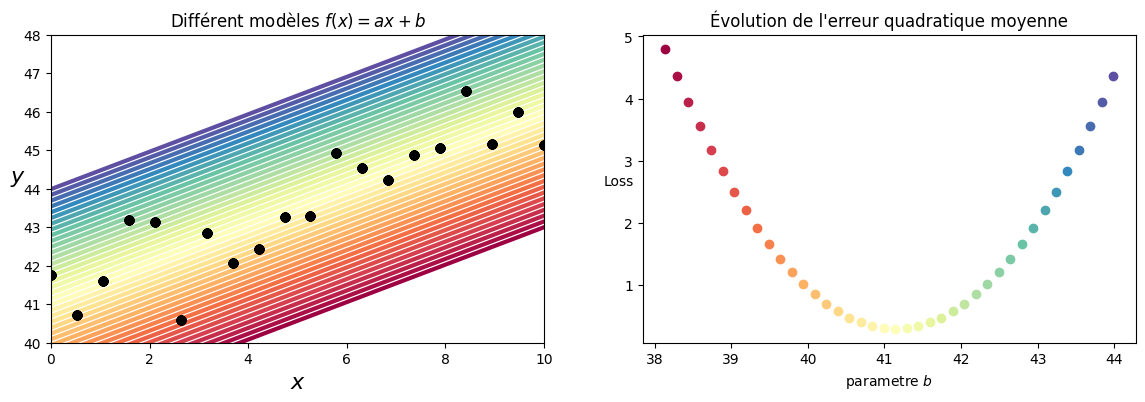

In [7]:
np.random.seed(0)

m = 20
X = np.linspace(0, 10, m)
y = 0.6 * X + 40 + np.random.randn(m)

model = LinearRegression().fit(X.reshape(-1, 1), y.reshape(-1, 1))
# preds = model.predict(X.reshape(-1, 1))  

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
list_bias = np.arange(-3, 3, 0.15)

color = iter(plt.cm.Spectral(np.linspace(0, 1, len(list_bias))))

for bias in list_bias:
  pred = X * model.coef_+ model.intercept_ + bias
  pred = pred.squeeze()
  c = next(color)
  ax[0].scatter(X, y, c='k', zorder=1)
  ax[0].plot(X, pred, c=c, lw=3, alpha=1, zorder=-1)
  ax[0].set_xlabel('$x$', fontsize=16)
  ax[0].set_ylabel('$y$', fontsize=16, rotation=0)
  ax[0].set_xlim(0, 10)
  ax[0].set_ylim(40, 48)

  L = 1/(2*m) * np.sum((pred - y)**2)
  ax[1].scatter(model.intercept_ + bias, L, color=c)
  ax[1].set_xlabel('parametre $b$')
  ax[1].set_ylabel('Loss', rotation=0)

ax[0].set_title('Différent modèles $f(x) = a x + b$')
ax[1].set_title('Évolution de l\'erreur quadratique moyenne')

plt.show()

By combining those two parameters, we get a 3D surface

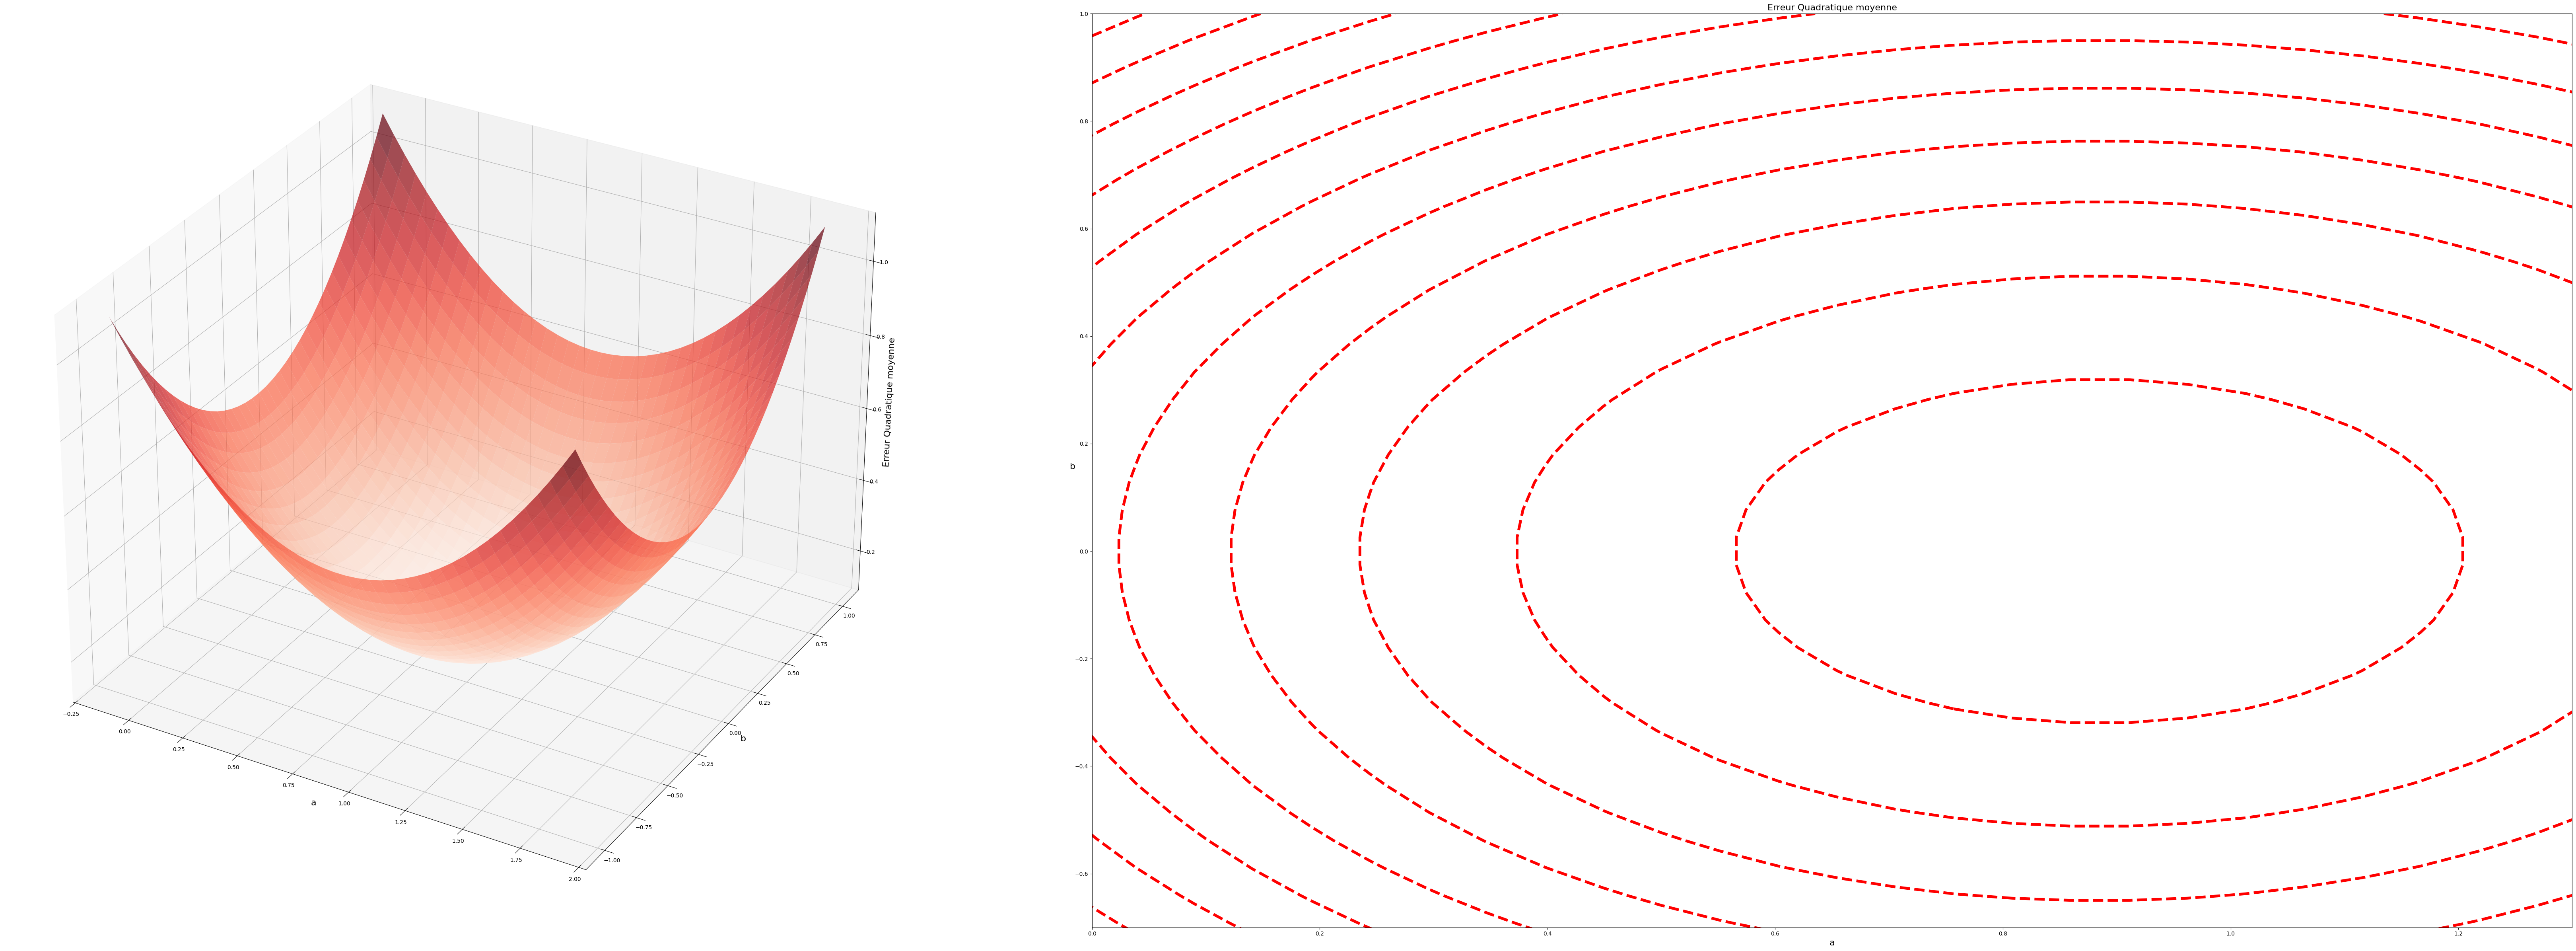

In [8]:
np.random.seed(0)

m = 20
X = np.linspace(0, 10, m)
y = 0.6 * X + 40 + np.random.randn(m)

# Data must be normalized otherwise the resulting graph is completely flattened
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

model = LinearRegression().fit(X.reshape(-1, 1), y.reshape(-1, 1))

n = 40
list_coefs = np.linspace(-1, 1, n) + model.coef_
list_bias = np.linspace(-1, 1, n) + model.intercept_

list_coefs, list_bias = np.meshgrid(list_coefs, list_bias)


preds = list_coefs.flatten().reshape((-1, 1)) * X + list_bias.flatten().reshape((-1, 1))
L = 1/(2*m) * np.sum((preds - y)**2, axis=1)
L.shape

L = L.reshape((n, n))


fontsize = 16
fig = plt.figure(figsize=(18*4, 6*4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(list_coefs, list_bias, L, cmap='Reds', alpha=0.7)
ax.set_xlabel('a', fontsize=fontsize)
ax.set_ylabel('b', fontsize=fontsize)
ax.set_zlabel('Erreur Quadratique moyenne', fontsize=fontsize)

ax1 = fig.add_subplot(1, 2, 2)
ax1.contour(list_coefs, list_bias, L, colors='r', levels=15, linewidths=5, linestyles='dashed')
ax1.set_xlabel('a', fontsize=fontsize)
ax1.set_ylabel('b', fontsize=fontsize, rotation=0)
ax1.set_title('Erreur Quadratique moyenne', fontsize=fontsize)
ax1.set_xlim(0, 1.3)
ax1.set_ylim(-0.7, 1)
fig.tight_layout()

Minimization is performed by finding the minimum of the mean squared error function. This can be accomplished using the gradient descent method, which is based on calculating the gradient of the mean squared error function.

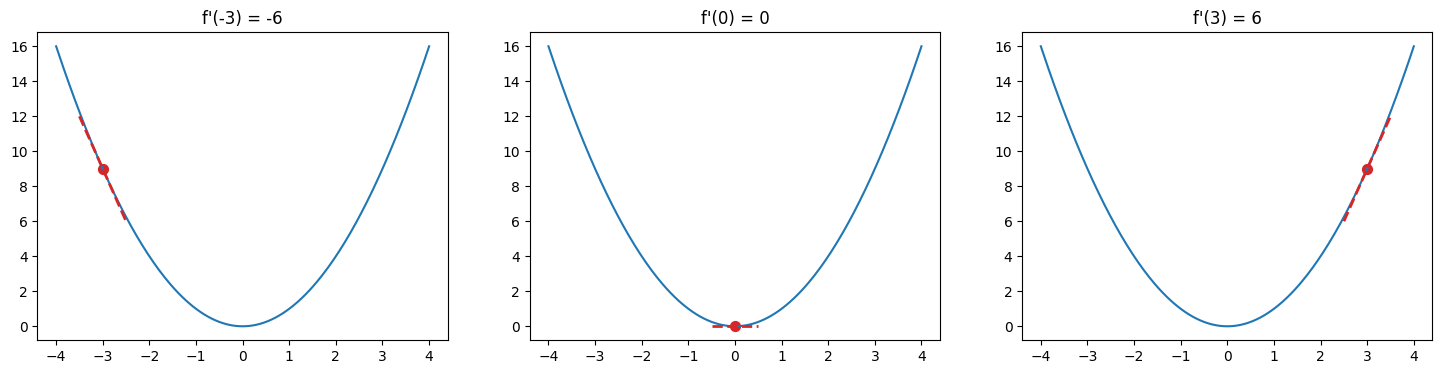

In [9]:
# Define parabola
def f(x):
    return x**2

# Define parabola derivative
def slope(x):
    return 2*x

# Define x data range for parabola
x = np.linspace(-4,4,200)

# Choose point to plot tangent line
# x1 = 3
# y1 = f(x1)

# Define tangent line
# y = m*(x - x1) + y1
def line(x, x1, y1):
    return slope(x1)*(x - x1) + y1

# Define x data range for tangent line
# xrange = np.linspace(x1-1, x1+1, 10)

# Plot the figure
fig, ax = plt.subplots(1, 3, figsize=(18, 4))
xs = [-3, 0, 3]
for i in range(3):
  x1 = xs[i]
  y1 = f(x1)
  xrange = np.linspace(x1-0.5, x1+0.5, 10)
  ax[i].plot(x, f(x))
  ax[i].scatter(x1, y1, color='C3', s=50)
  ax[i].plot(xrange, line(xrange, x1, y1), 'C3--', linewidth = 2)
  ax[i].set_title(f'f\'({x1}) = {2*x1}')

With these gradients, we know which direction to move in order to minimize the mean squared error function. We can therefore perform gradient descent by following the gradient.

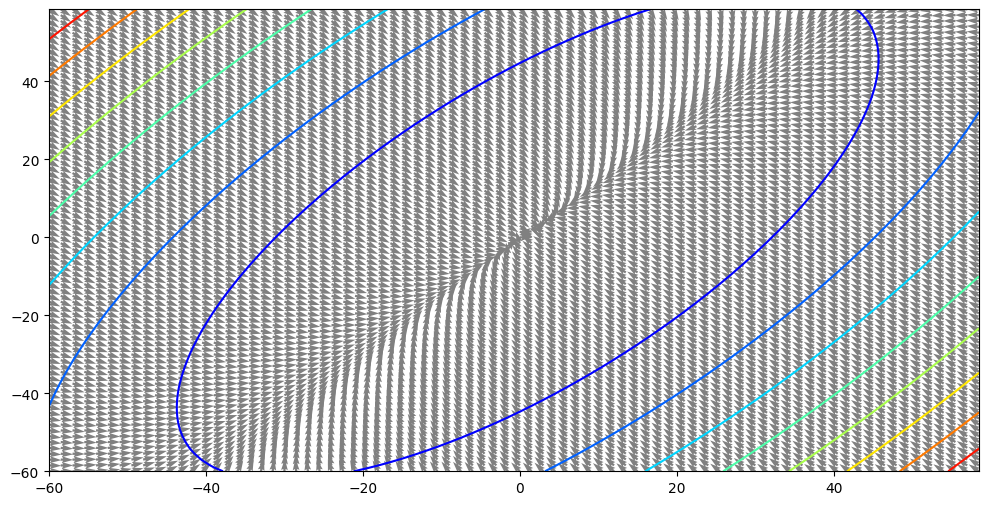

In [11]:
feature_x = np.arange(-60, 60, 1.5)
feature_y = np.arange(-60, 60, 1.5)

x, y = np.meshgrid(feature_x, feature_y)
z = 0.5*(y-x)**2 + 0.5*(1-x)**2
u = 2*x - y - 1
v = y - x

# Normalize all gradients to focus on the direction not the magnitude
norm = np.linalg.norm(np.array((u, v)), axis=0)
u = u / norm
v = v / norm

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
# ax.set_aspect(1)
# ax.plot(feature_x, feature_y, c='k')
ax.quiver(x, y, -u, -v, units='xy', scale=0.5, color='gray')
ax.contour(x, y, z, 10, cmap='jet')